In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc

In [4]:
# Read the first CSV file
metrics_df1 = pd.read_csv('data/metrics.csv')

# Read the second CSV file
metrics_df2 = pd.read_csv('data/scVI_metrics.csv')

# Concatenate the DataFrames
combined_metrics_df = pd.concat([metrics_df1, metrics_df2], ignore_index=True)

combined_metrics_df

,Method,Metric,Value
0,unintegrated,Batch ASW,0.472296
1,unintegrated,Biological ASW,0.606738
2,scanorama,Batch ASW,0.474624
3,scanorama,Biological ASW,0.603229
4,harmony,Batch ASW,0.432603
5,harmony,Biological ASW,0.661673
6,scVI,Batch ASW,0.466105
7,scVI,Biological ASW,0.646546


In [5]:
combined_metrics_df.to_csv('data/combined_metrics.csv', index=False)

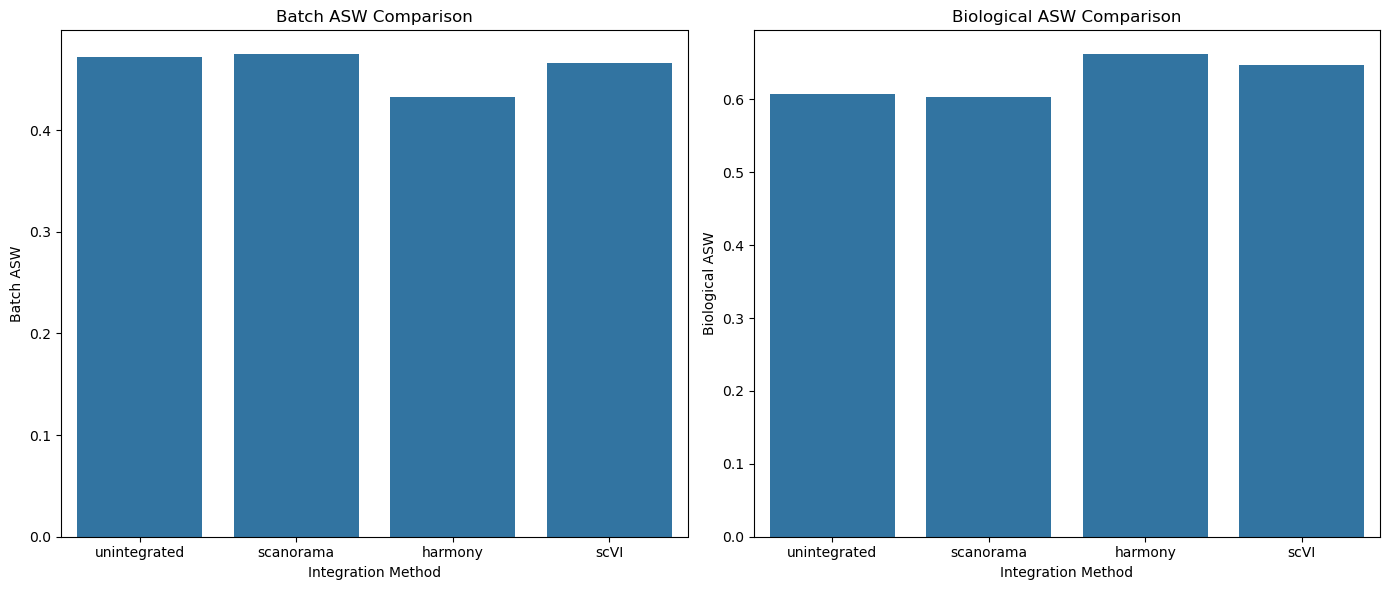

In [10]:
metrics_df = combined_metrics_df

# Create the 1x2 subplot figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Batch ASW
sns.barplot(x='Method', y='Value', data=metrics_df[metrics_df['Metric'] == 'Batch ASW'], ax=axes[0])
axes[0].set_title('Batch ASW Comparison')
axes[0].set_ylabel('Batch ASW')
axes[0].set_xlabel('Integration Method')

# Plot Biological ASW
sns.barplot(x='Method', y='Value', data=metrics_df[metrics_df['Metric'] == 'Biological ASW'], ax=axes[1])
axes[1].set_title('Biological ASW Comparison')
axes[1].set_ylabel('Biological ASW')
axes[1].set_xlabel('Integration Method')

plt.tight_layout()
plt.show()

In [13]:
methods = ['unintegrated', 'scanorama', 'harmony']

for method in methods:
    adata = sc.read_h5ad(f"{method}_adata.h5ad")
    sc.pl.umap(adata, color=['sample_id', 'cell_type'], legend_loc=None, save=f'_selectedsamples_{method}.png')

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'unintegrated_adata.h5ad', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)